In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

Raw = Path("../data/raw/yellow_2023-01.parquet") # getting the raw data
df = pd.read_parquet(Raw) # reading the data
df.head() # return the first 5 rows
df.info() # basically give the schema and a couple summary stats
df.describe() # give the summary stats for the numerical columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,3.066766e+06,3066766,3066766,2.995023e+06,3.066766e+06,2.995023e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,3.066766e+06,2.995023e+06,2.995023e+06
mean,1.730215e+00,2023-01-17 00:22:26.288164,2023-01-17 00:38:06.427874,1.362532e+00,3.847342e+00,1.497440e+00,1.663980e+02,1.643926e+02,1.194483e+00,1.836707e+01,1.537842e+00,4.882900e-01,3.367941e+00,5.184907e-01,9.820847e-01,2.702038e+01,2.274231e+00,1.074086e-01
min,1.000000e+00,2008-12-31 23:01:42,2009-01-01 14:29:11,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-9.000000e+02,-7.500000e+00,-5.000000e-01,-9.622000e+01,-6.500000e+01,-1.000000e+00,-7.510000e+02,-2.500000e+00,-1.250000e+00
25%,1.000000e+00,2023-01-09 16:21:57.250000,2023-01-09 16:37:06,1.000000e+00,1.060000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,8.600000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.540000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2023-01-17 08:42:29.500000,2023-01-17 08:58:30.500000,1.000000e+00,1.800000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.280000e+01,1.000000e+00,5.000000e-01,2.720000e+00,0.000000e+00,1.000000e+00,2.016000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2023-01-24 16:26:27,2023-01-24 16:42:49,1.000000e+00,3.330000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.050000e+01,2.500000e+00,5.000000e-01,4.200000e+00,0.000000e+00,1.000000e+00,2.870000e+01,2.500000e+00,0.000000e+00
max,2.000000e+00,2023-02-01 00:56:53,2023-02-02 09:28:47,9.000000e+00,2.589281e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,1.160100e+03,1.250000e+01,5.316000e+01,3.808000e+02,1.969900e+02,1.000000e+00,1.169400e+03,2.500000e+00,1.250000e+00
std,4.438480e-01,NaN,NaN,8.961200e-01,2.495838e+02,6.474767e+00,6.424413e+01,6.994368e+01,5.294762e-01,1.780782e+01,1.789592e+00,1.034641e-01,3.826759e+00,2.017579e+00,1.833529e-01,2.216359e+01,7.718454e-01,3.556511e-01


In [2]:
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"]) # converting pickup time to datetime format
df["tpep_dropoff_datetime"] = pd.to_datetime(df["tpep_dropoff_datetime"]) # converting dropoff time to datetime format

df = df.sort_values(by="tpep_pickup_datetime").reset_index(drop=True) # sort the data by pickup time and reset the index because time series operations assume a sorted index

print(df["tpep_pickup_datetime"].dtype)
print(df["tpep_dropoff_datetime"].dtype)

datetime64[us]
datetime64[us]


In [3]:
initial_rows = df.shape[0]

df = df[df["total_amount"] > 0] # remove rows with negative or zero fares

after_amount_filter = df.shape[0]

df["trip_duration_min"] = (df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]).dt.total_seconds() / 60 # calculate trip duration in minutes
df = df[(df["trip_duration_min"] > 1) & (df["trip_duration_min"] < 180)] # remove rows with negative, zero, or too long trip duration

final_rows = df.shape[0]

print(f"""| Filter Rule | Rows Before | Rows After | Rows Dropped |
|-------------|-------------|------------|--------------|
| total_amount > 0 | {initial_rows:,} | {after_amount_filter:,} | {initial_rows - after_amount_filter:,} |
| trip_duration filter | {after_amount_filter:,} | {final_rows:,} | {after_amount_filter - final_rows:,} |""")

| Filter Rule | Rows Before | Rows After | Rows Dropped |
|-------------|-------------|------------|--------------|
| total_amount > 0 | 3,066,766 | 3,040,994 | 25,772 |
| trip_duration filter | 3,040,994 | 3,009,332 | 31,662 |


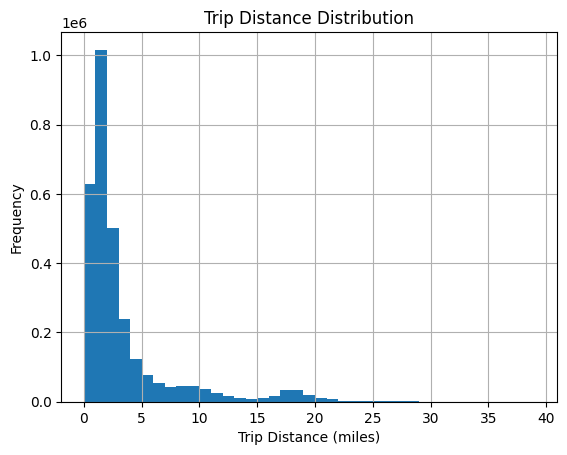

In [14]:
import matplotlib.pyplot as plt
import numpy as np

bins = list(range(0,40)) + [np.inf]
df["trip_distance"].hist(bins=bins)
plt.title("Trip Distance Distribution")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Frequency")
plt.show()

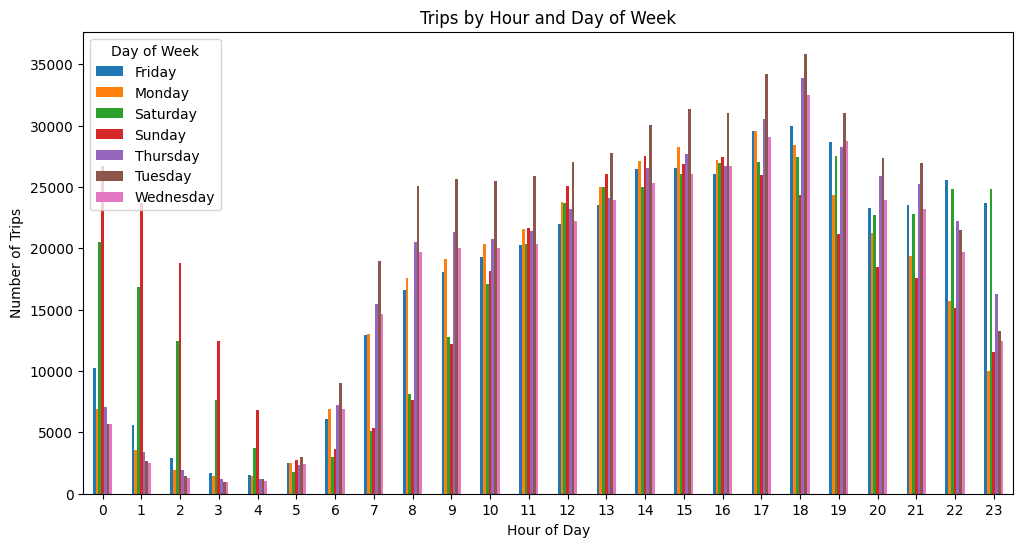

In [19]:
import matplotlib.pyplot as plt

df["hour"] = df["tpep_pickup_datetime"].dt.hour
df["day_of_week"] = df["tpep_pickup_datetime"].dt.day_name()

pivot_data = df.groupby(["hour", "day_of_week"]).size().unstack(fill_value=0)
pivot_data.plot(kind="bar", figsize=(12, 6))
plt.title("Trips by Hour and Day of Week")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.legend(title="Day of Week")
plt.xticks(rotation=0)


plt.show()